# 随机森林案例（回归）

## RandomForestRegressor

- **n_estimators**：随机森林中树的数量（决策树的个数）。
    - 更多的树通常会提升模型的性能，但也会增加训练和预测的时间成本。
- **criterion**：树节点分裂时的指标
    - squared_error：均方误差（MSE），默认选项，效果良好
    - absolute_error：平均绝对误差（MAE）
    - friedman_mse：弗里德曼均方误差，用于处理具有高方差的回归问题
    - poisson：泊松误差，用于计数型目标变量
- **max_depth**：决策树的最大深度。
    - 通过限制树的深度，可以防止模型过拟合
- **min_samples_split**：控制内部节点分裂所需的最小样本数。
    - 较大的值可以减少模型的过拟合。
- **min_samples_leaf**：叶子节点所需的最小样本数
    - 避免叶子节点包含少量样本，可以减少过拟合
- **max_features**：在每次分裂时考虑的最大特征数
    - 随机选取部分特征可以增加模型的随机性，从而减少过拟合
- **n_jobs**：指定并行训练的线程数，可以大幅加速训练过程
- **random_state**：设置随机种子，用于结果的可复现性
- **verbose**：控制是否打印训练过程中的输出信息
    - 0：不输出
    - 1：每完成一棵树的训练输出信息
    - 2：每完成一次并行操作输出信息
- **class_weight**：调整类别的权重，以处理类别不平衡问题。对于类别不平衡数据，建议设置为 "balanced"
    - "balanced"：根据类别频率自动调整权重为 $n_\text{samples} / (n_\text{classes} \times n_\text{samples in class})$。
    - "balanced_subsample"：类似于 "balanced"，但只基于每棵树的引导样本计算权重。
    - 字典形式：手动设置各类别的权重，如 {0: 1, 1: 5}。

## 波士顿房价数据集

**Boston Housing Dataset（波士顿房价数据集）**是一个回归数据集，该数据集包含506个样本，每个样本有13个特征，该数据集用于根据犯罪率、房屋房间数、空气污染等因素对波士顿地区的房价进行预测。

- MEDV：住房价格中位数（单位：千美元）
- CRIM：该镇的人均犯罪率
- ZN：住宅用地超过 25000 平方英尺的比例（%）
- INDUS：非零售商用土地比例（%）
- CHAS：是否靠近查尔斯河（1=是，0=否）
- NOX：一氧化氮浓度（空气污染指标，单位：ppm）
- RM：每栋住宅的平均房间数
- AGE：1940 年之前建成房屋的比例（%）
- DIS：到波士顿五个中心区域的加权距离
- RAD：距离高速公路的便利指数
- TAX：每 $10,000 资产的房产税率
- PTRATIO：城镇师生比例
- B：黑人比例指标
- LSTAT：低收入人群比例（%）

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 加载波士顿房价数据集
# 该数据集包含506个样本，每个样本有13个特征，用于预测房价
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data  # 特征变量
y = boston.target  # 目标变量（房价）
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

## 代码实现

=== 评估指标 ===
MSE: 7.9015
RMSE: 2.8110
MAE: 2.0395
MAPE: 11.09%
R² Score: 0.8923


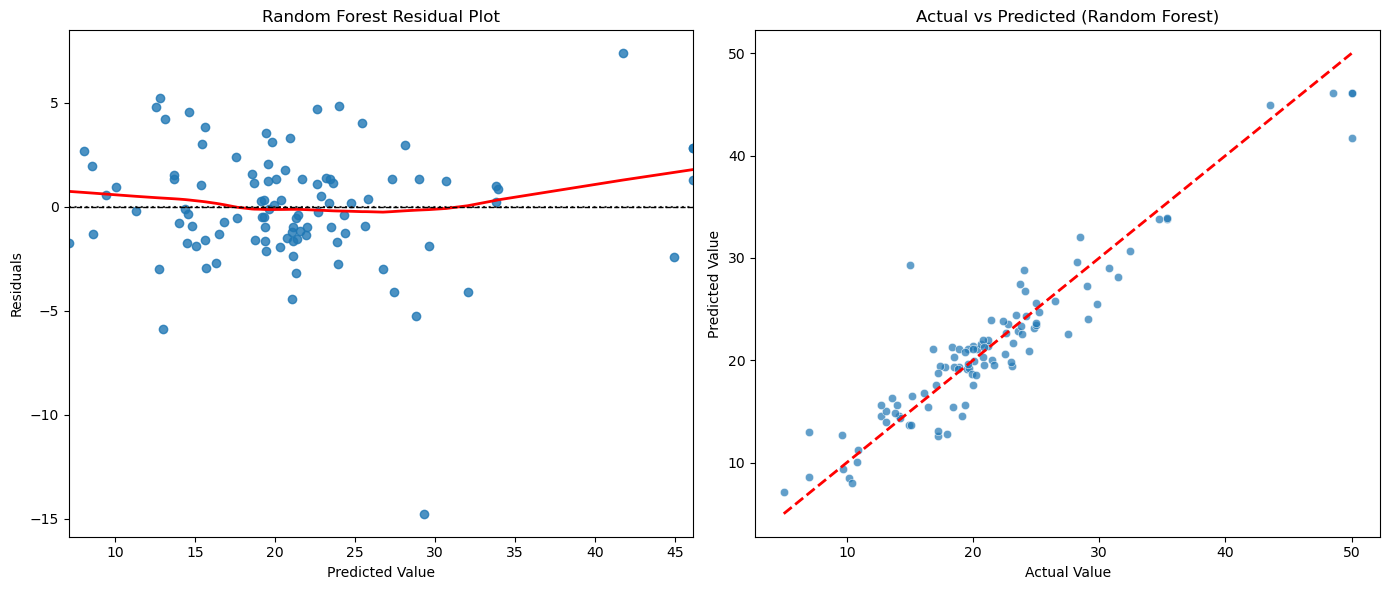

In [2]:
# 划分训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义随机森林回归模型
rf_regressor = RandomForestRegressor(
    random_state=42          # 确保结果可复现
)

# 训练模型
rf_regressor.fit(X_train, y_train)

# 进行预测
y_pred = rf_regressor.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# 输出评估指标
print("=== 评估指标 ===")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

# 计算残差
residuals = y_test - y_pred

# 可视化部分
plt.figure(figsize=(14, 6))

# 1. 残差图
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Plot")

# 2. 实际值 vs 预测值
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted (Random Forest)")

plt.tight_layout()
plt.show()

# 随机森林可视化

## export_text

**export_text**: 将训练好的决策树模型转换为可读的文本规则
- `decision_tree`: 训练好的决策树模型
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `max_depth`: 导出的最大深度
- `spacing`: 缩进空格数
- `decimals`: 数值的小数位数
- `show_weights`: 是否显示样本权重信息

In [3]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 从随机森林中选择一棵树
single_tree = rf_regressor.estimators_[1]

# 决策树可视化
# 文本形式展示决策规则
tree_rules = export_text(single_tree, feature_names=boston.feature_names)
print("\n决策规则:")
print(tree_rules)


决策规则:
|--- RM <= 6.85
|   |--- LSTAT <= 14.39
|   |   |--- DIS <= 1.38
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.38
|   |   |   |--- LSTAT <= 6.70
|   |   |   |   |--- RM <= 6.52
|   |   |   |   |   |--- AGE <= 55.75
|   |   |   |   |   |   |--- RM <= 6.36
|   |   |   |   |   |   |   |--- TAX <= 260.00
|   |   |   |   |   |   |   |   |--- value: [25.30]
|   |   |   |   |   |   |   |--- TAX >  260.00
|   |   |   |   |   |   |   |   |--- AGE <= 30.65
|   |   |   |   |   |   |   |   |   |--- RM <= 6.33
|   |   |   |   |   |   |   |   |   |   |--- PTRATIO <= 17.85
|   |   |   |   |   |   |   |   |   |   |   |--- value: [23.50]
|   |   |   |   |   |   |   |   |   |   |--- PTRATIO >  17.85
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- RM >  6.33
|   |   |   |   |   |   |   |   |   |   |--- value: [22.50]
|   |   |   |   |   |   |   |   |--- AGE >  30.65
|   |   |   |   |   |   |   |   |   |--- PTRATIO <= 17.

## plot_tree

**plot_tree**: 生成直观的决策树树形结构图
- `decision_tree`: 训练好的决策树模型
- `max_depth`: 显示的最大深度
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `label`: 节点信息显示内容
- `filled`: 是否填充颜色
- `impurity`: 是否显示不纯度
- `node_ids`: 是否显示节点ID
- `proportion`: 是否显示比例
- `rounded`: 是否圆角边框
- `precision`: 数值显示精度
- `fontsize`: 字体大小

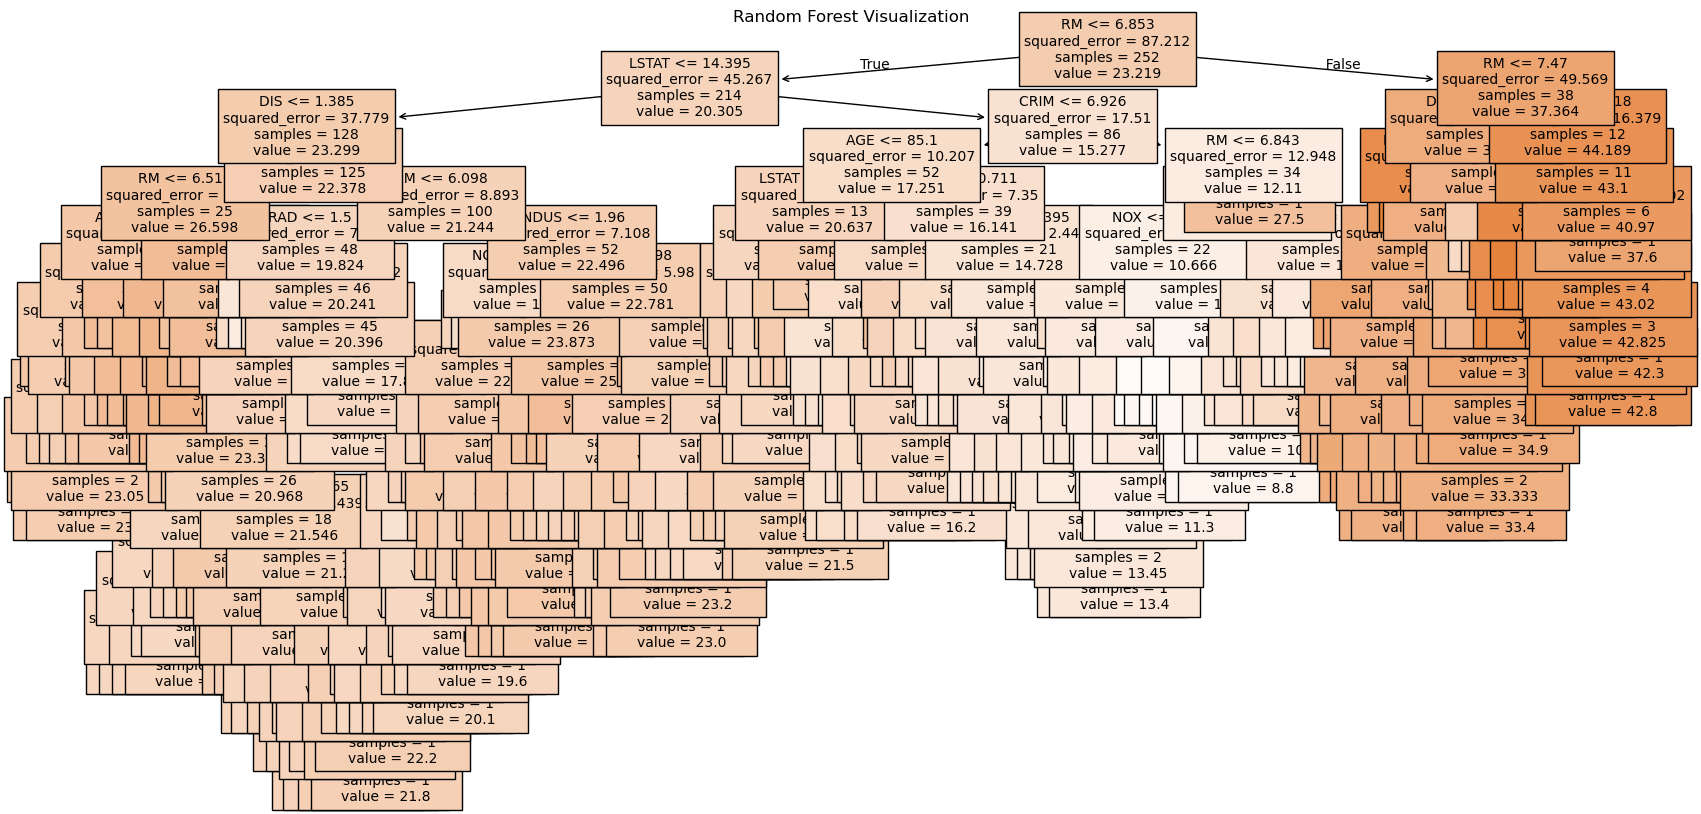

In [4]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 从随机森林中选择一棵树
single_tree = rf_regressor.estimators_[1]

# 使用 sklearn 内置的 plot_tree 方法可视化
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=boston.feature_names, filled=True, fontsize=10)
plt.title("Random Forest Visualization")
plt.show()

# 特征重要度

**特征重要性(feature importance)**是随机森林模型中用于衡量各个特征对预测结果贡献程度的指标。
- 对于随机森林中的每棵树，每次决策树在某特征上进行划分时，都会带来一定的分裂误差下降（例如 MSE 下降）。 
- 把所有由该特征引起的MSE下降值累加，再进行归一化（总和为 1），即可得到特征重要度。
- 计算公式为：
$$\text{Importance}_j = \frac{1}{N_{\text{trees}}} \sum_{T} \sum_{t \in T} \frac{\text{ΔMSE}_t}{\text{TotalSplits}_T} \cdot I(j \in t)$$
- 其中：
    - $\text{ΔMSE}_t$：节点$t$的MSE下降 
    - $I(j \in t)$：指示函数（特征$j$是否用于分裂）
    - $N$：随机森林中树的棵树 

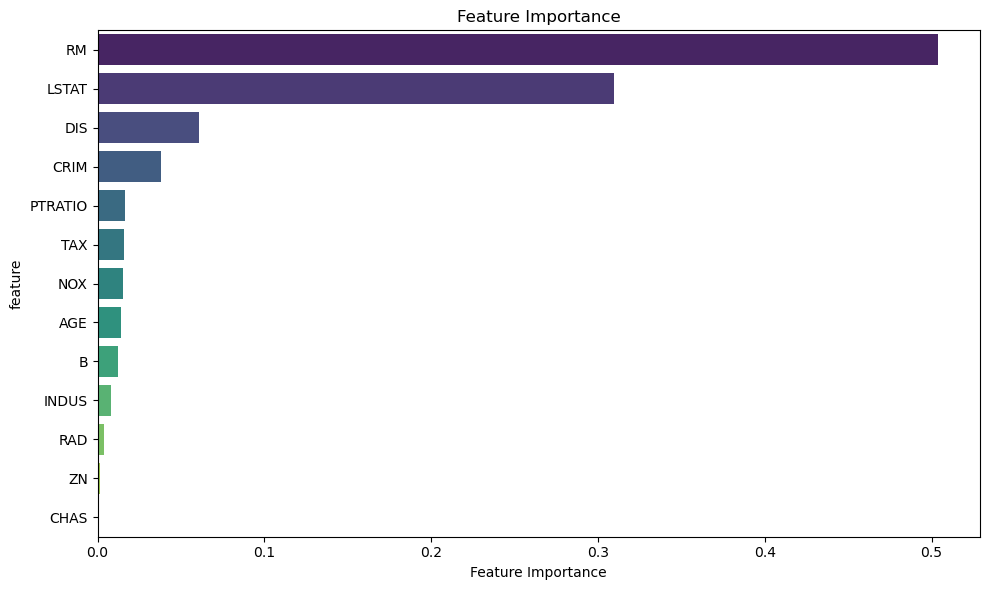

In [3]:
# 特征重要性可视化
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_imp, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()